Try fitting the EGGR 38 TESS light curve, bringing in new tools as I need/find them

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import lightkurve as lk
from astropy.modeling import models, fitting
from scipy.optimize import curve_fit

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [3]:
search_result = lk.search_lightcurve('TIC245830829')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 43,2021,SPOC,20,245830829,0.0
1,TESS Sector 43,2021,SPOC,120,245830829,0.0
2,TESS Sector 44,2021,SPOC,20,245830829,0.0
3,TESS Sector 44,2021,SPOC,120,245830829,0.0


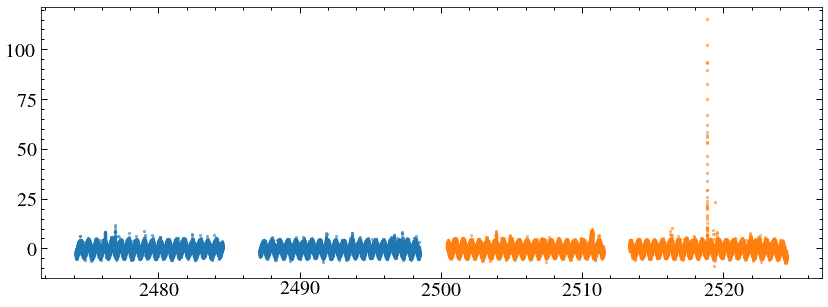

13.531378263295679 h
0.56380742763732 d


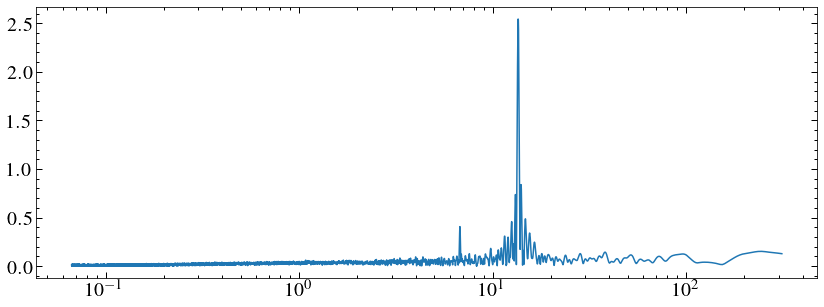

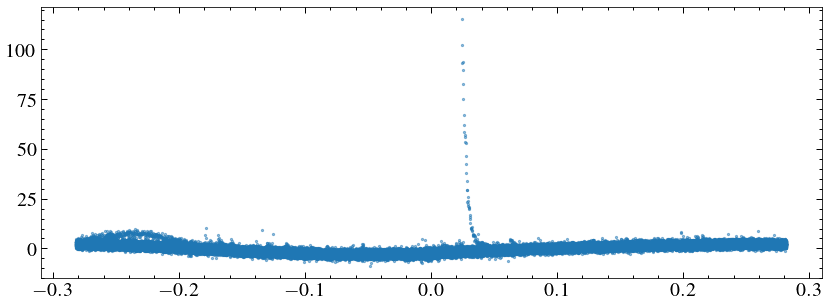

In [34]:
star = 'EGGR 38'
for result in search_result:
    # print(result.exptime)
    n  = 0 
    if result.exptime.value == 20:
        lc = result[0].download(download_dir='data/')
        # lc =lc.flatten(10001)
        lc = lc.normalize('percent')
        plt.scatter(lc.time.value, lc.flux.value-100, s=5, alpha = 0.5, rasterized=True)
        if n == 0:
            lc_all = lc
        else:
            lc_all.append(lc)
        n += 1
        if star == 'EG Uma':
            plt.show()
plt.show()
pg = lc_all.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
plt.plot(pg.period.to(u.h), pg.power)
plt.xscale('log')
# plt.axvline(coords['Period_d'][i]*u.d.to(u.h), ls='--', c='C1')
print(pg.period_at_max_power.to(u.h))
print(pg.period_at_max_power)
plt.show()
lcf = lc_all.fold(pg.period_at_max_power)
plt.scatter(lcf.time.value, lcf.flux.value-100, s=5, alpha = 0.5, rasterized=True)



# if star == b'CC Cet':
# plt.xlim(2503, 2504)
plt.show()

(2518.75, 2518.9)

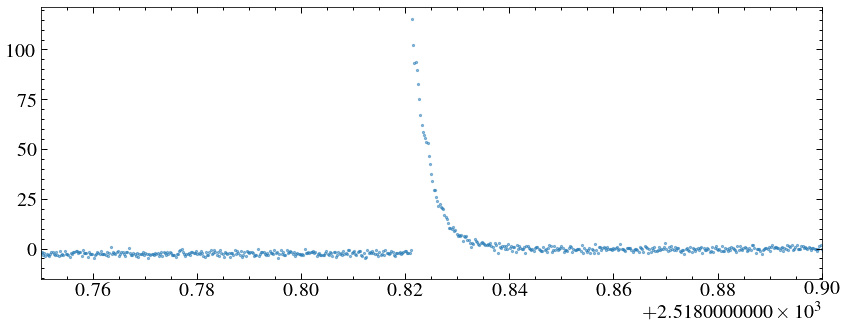

In [35]:
plt.scatter(lc_all.time.value, lc_all.flux.value-100, s=5, alpha = 0.5, rasterized=True)
plt.xlim(2518.75, 2518.9)

In [36]:
import sys  
sys.path.append('/home/david/work/flare_model/Llamaradas-Estelares/') #Edit this to your own file path
from Flare_model import flare_model


In [37]:
fmask = (lc_all.time.value > 2518.8) & (lc_all.time.value < 2518.86)

In [38]:
lcflare = lc_all[fmask]

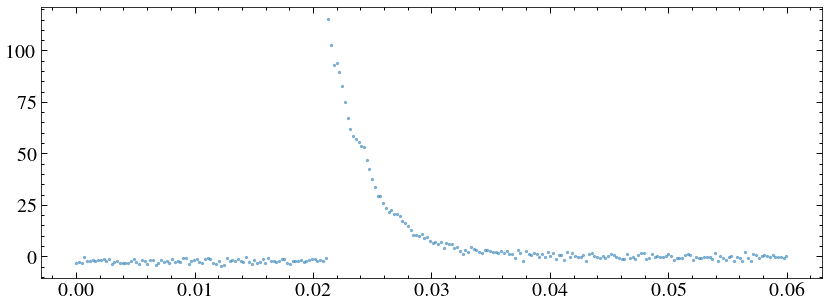

In [39]:
# plt.scatter(lcflare.time.value, lcflare.flux.value-100, s=5, alpha = 0.5)
flaret, flaref = lcflare.time.value-2518.8, lcflare.flux.value-100
plt.scatter(flaret, flaref, s=5, alpha = 0.5)


In [40]:
init_vals=[0.02, 0.005, 100] #[tpeak, FWHM, amp]
popt, pcov = curve_fit(flare_model, flaret,flaref, p0=init_vals,maxfev=10000)



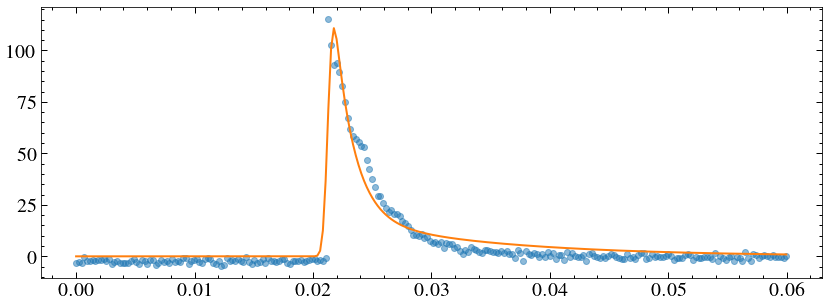

In [43]:
plt.scatter(flaret, flaref, alpha =0.5)

plt.plot(flaret, flare_model(flaret, *popt, uptime=50,upsample=True),color='C1', label='Model Fit', lw=2)

Reasonable. Need to identify flares and fit underlying trend first

NameError: name 'version' is not defined